In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [14]:
raw_data = """
HACOR	Outcome avverso (MI+IOT)
2	0
0	0
2	0
0	0
0	1
6	0
2	0
3	1
2	0
3	0
3	0
0	0
0	0
0	0
0	0
6	0
0	0
2	0
0	0
0	1
2	0
0	0
7	0
0	0
6	1
0	0
2	0
5	0
2	0
4	0
2	0
0	0
0	0
3	0
2	1
5	0
2	0
4	0
4	0
2	0
2	0
0	0
3	0
2	0
2	0
0	1
4	0
5	0
4	0
0	1
2	1
7	1
0	1
5	0
0	1
3	1
"""

data = list(map(lambda x: x.split("\t"), raw_data.split("\n")))
data = data[1:len(data)-1]
cols = data[0]
data = data[1:]
df = pd.DataFrame(data, columns=cols)

In [16]:
cut_offs = [1, 2, 3, 4, 5]
for cut in cut_offs:
    df["cut_off_{}".format(cut)] = (df['HACOR'].astype(np.int64) > cut).astype(np.int64)

In [17]:
outcome = df["Outcome avverso (MI+IOT)"].astype(np.int64)

In [20]:
reports = []
for col in df.iloc[:, 2:7]:
    cut_off = int(col.split("cut_off_")[1]) 
#     report = metrics.classification_report(outcome, df[col])
#     reports.append(report)
    print(col)
#     print(report)
#     tn, fp, fn, tp = metrics.confusion_matrix(outcome, df[col]).ravel()
    tp = len(df[(df["HACOR"].astype(np.int64) > cut_off) & (df["Outcome avverso (MI+IOT)"] == "1")])
    fp = len(df[(df["HACOR"].astype(np.int64) > cut_off) & (df["Outcome avverso (MI+IOT)"] == "0")])
    tn = len(df[(df["HACOR"].astype(np.int64) <= cut_off) & (df["Outcome avverso (MI+IOT)"] == "0")])
    fn = len(df[(df["HACOR"].astype(np.int64) <= cut_off) & (df["Outcome avverso (MI+IOT)"] == "1")])
    print("Veri negativi: %s" % tn)
    print("Falsi positivi: %s" % fp)
    print("Falsi negativi: %s" % fn)
    print("Veri positivi: %s" % tp)
       
    sensibilita = len(df[(df["HACOR"].astype(np.int64) > cut_off) & (df["Outcome avverso (MI+IOT)"] == "1")]) / outcome.sum()
    specificita = len(df[(df["HACOR"].astype(np.int64) <= cut_off) & (df["Outcome avverso (MI+IOT)"] == "0")]) / (len(outcome) - outcome.sum())
    print("Sensibilità: {:.2f}".format(sensibilita))
    print("Specificità: {:.2f}".format(specificita))
    
    valore_predittivo_positivo = len(df[(df["HACOR"].astype(np.int64) > cut_off) & (df["Outcome avverso (MI+IOT)"] == "1")]) / len(df["HACOR"].astype(np.int64) > cut_off)
    valore_predittivo_negativo = len(df[(df["HACOR"].astype(np.int64) <= cut_off) & (df["Outcome avverso (MI+IOT)"] == "0")]) / len(df["HACOR"].astype(np.int64) <= cut_off)
    print("Valore predittivo positivo: {:.2f}".format(valore_predittivo_positivo))
    print("Valore predittivo negativo: {:.2f}\n\n".format(valore_predittivo_negativo))
    

cut_off_1
Veri negativi: 14
Falsi positivi: 30
Falsi negativi: 6
Veri positivi: 6
Sensibilità: 0.50
Specificità: 0.32
Valore predittivo positivo: 0.11
Valore predittivo negativo: 0.25


cut_off_2
Veri negativi: 28
Falsi positivi: 16
Falsi negativi: 8
Veri positivi: 4
Sensibilità: 0.33
Specificità: 0.64
Valore predittivo positivo: 0.07
Valore predittivo negativo: 0.50


cut_off_3
Veri negativi: 32
Falsi positivi: 12
Falsi negativi: 10
Veri positivi: 2
Sensibilità: 0.17
Specificità: 0.73
Valore predittivo positivo: 0.04
Valore predittivo negativo: 0.57


cut_off_4
Veri negativi: 37
Falsi positivi: 7
Falsi negativi: 10
Veri positivi: 2
Sensibilità: 0.17
Specificità: 0.84
Valore predittivo positivo: 0.04
Valore predittivo negativo: 0.66


cut_off_5
Veri negativi: 41
Falsi positivi: 3
Falsi negativi: 10
Veri positivi: 2
Sensibilità: 0.17
Specificità: 0.93
Valore predittivo positivo: 0.04
Valore predittivo negativo: 0.73




In [ ]:
import matplotlib.pyplot as plt

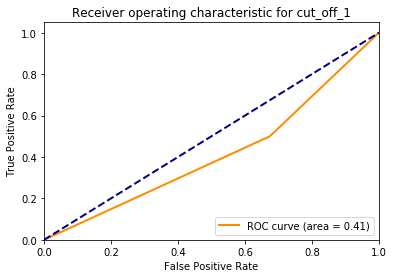

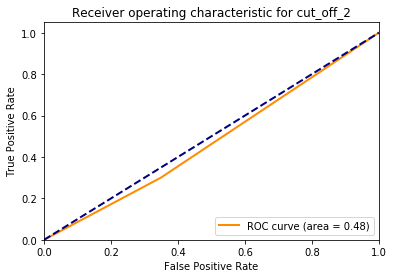

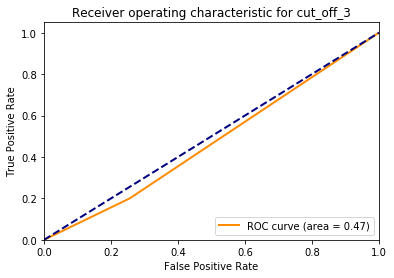

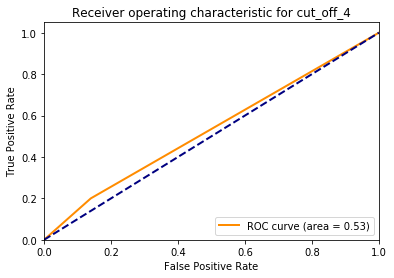

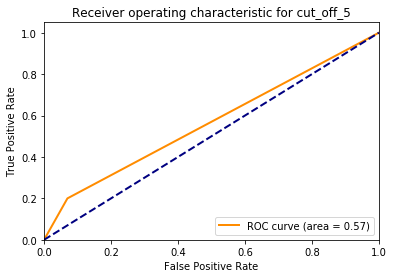

In [121]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for col in df.iloc[:, 2:7]:
    fpr[col], tpr[col], _ = metrics.roc_curve(outcome, df[col])
    roc_auc[col] = metrics.auc(fpr[col], tpr[col])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr[col], tpr[col], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[col])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(col))
    plt.legend(loc="lower right")
    plt.show()